*LINEAR REGRESSION UYGULAMASI*
Adımlar:

1- Önce Datayı ham olarak inceleyelim

2- Datayı import edelim

3- Datayı inceleyelim (head, describe, info)

4- Datayı görselleştir

5- Modeli oluştur (formuller)

6- Hazırlık

7- Train-Test Split

8- Lineer Regresyon Modelini Çalıştır (Fit)

9- Katsayıları Hesaplama (intercept_, coef_)

10- Tahmin Yap (Predict)

11- Gerçek Data ve Tahmin Datasını Çiz

12- Hataları Çiz (y-y(kepli))

13- Model Doğruluğunu Kontrol Et (RMSE, ve $R^2$)

14- Yorumlar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression #regresyonu kullanmak için
from sklearn.model_selection import train_test_split #datayı train ve test olarak ikiye ayırdık

In [2]:
df=pd.read_csv("Advertising.csv", index_col=0)

In [3]:
df.tail(3) #kuyruk yani son satırları görüntüledi

,TV,radio,newspaper,sales
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [4]:
df.info() #genel bilgileri görmek içindir

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


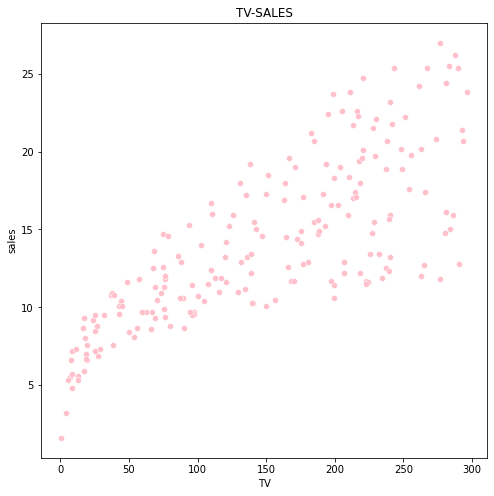

In [3]:
data=df[["TV","sales"]]
X=data["TV"]
y=data["sales"]

plt.figure(figsize=(8,8))

#data=data adı x= x ekseninde ne var y= y ekseninde ne var ve rengi
sns.scatterplot(data=data,x="TV",y="sales",color="pink") #burada "c="pink"" kısaltmasını kabul etmedi.

plt.title("TV-SALES")
plt.show()

In [4]:
lr=LinearRegression()

In [5]:
"""X ve ynin boyutu lineara uygun değil(200,) burada 200 satır güzuküyor ama sütun kısmı boş, regresyon 
için uygun biçime getirmemiz gerekiyor (200,1). Yani 200 adet n değeri 1 adet p değeri (TV)."""
X= X.values.reshape(-1,1) #burdaki -1 diyor ki Xin boyutunu kabul et ve 1 tane ekle
y= y.values.reshape(-1,1)

In [6]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30, random_state=100) #train_test_split nupmy_narray'e dönüyor

In [25]:
#Burada datanın %70ini train kısmına, %30 kısmını ise test kısmına ayırdık. 200 satır sayısına göre bakılır.
print("X_train_size: ",X_train.shape)
print("X_test_size: ",X_test.shape)

print("y_train_size: ",y_train.shape)
print("y_test_size: ",y_test.shape)

X_train_size:  (140, 1)
X_test_size:  (60, 1)
y_train_size:  (140, 1)
y_test_size:  (60, 1)


In [26]:
lr.fit(X_train, y_train) #Regresyonu çalıştırıyoruz.Öğrenme aşaması!

LinearRegression()

In [27]:
#Katsayıları hesaplama intercept= Beta 0
print("intercept:",lr.intercept_)

intercept: [6.98966586]


In [28]:
#slop- coefificent= Beta 1
print("Slop (coefificent) eğim:",lr.coef_)

Slop (coefificent) eğim: [[0.04649736]]


In [29]:
#tahmin yapma
y_pred=lr.predict(X_test)

In [30]:
#tahmin
y_pred.shape

(60, 1)

In [31]:
#gerçek
y_test.shape

(60, 1)

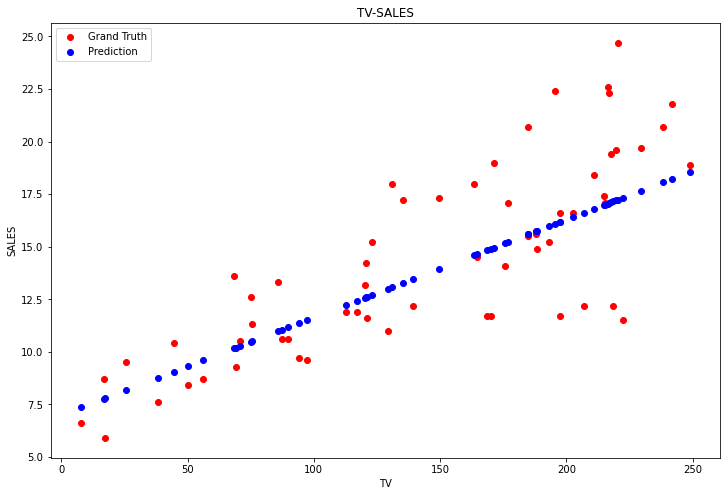

In [32]:
#Bir grafik  üzerinde iki ayrı data çizilecekse subplots kullanılır.
#grand trhuht= gerçek data
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(X_test,y_test,label="Grand Truth",c="red")

#tahmin
ax.scatter(X_test, y_pred, label="Prediction", c="blue")

plt.title("TV-SALES")
plt.xlabel("TV")
plt.ylabel("SALES") 
plt.legend(loc="upper left") #yer belirledi
plt.show()

In [33]:
y_test[0:10] #0'dan 10a kdr ilk gerçek 10 data

array([[ 6.6],
       [20.7],
       [17.2],
       [19.4],
       [21.8],
       [12.2],
       [12.2],
       [11.7],
       [22.6],
       [22.3]])

In [35]:
y_pred[0:10] #tahmin edilen ilk 10 data

array([[ 7.35234526],
       [18.06533671],
       [13.27610876],
       [17.11214086],
       [18.22807747],
       [16.60531965],
       [13.4620982 ],
       [16.17754395],
       [17.05169429],
       [17.07029323]])

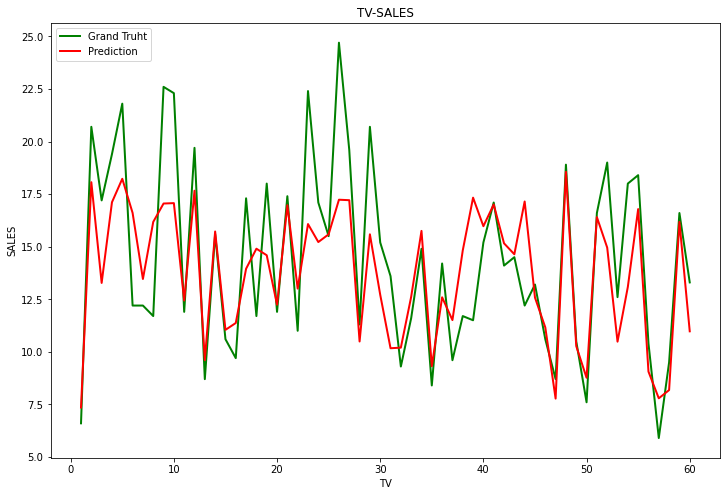

In [47]:
# Her bir tahmin noktasındaki değişimi
indexler=range(1,61) #testte 60 adet data kullandık onları görüntüleyeceğiz.
#Gerçek data
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(indexler,y_test,label="Grand Truht",color="green",linewidth="2") #sadece plot yazdık scatter yerine çünkü çizgi grafiği olsun istiyoruz.
#Tahmini data
ax.plot(indexler,y_pred,label="Prediction",color="red",linewidth="2")

plt.title("TV-SALES")
plt.xlabel("TV")
plt.ylabel("SALES")
plt.legend(loc="upper left")
plt.show()

In [49]:
import numpy as np

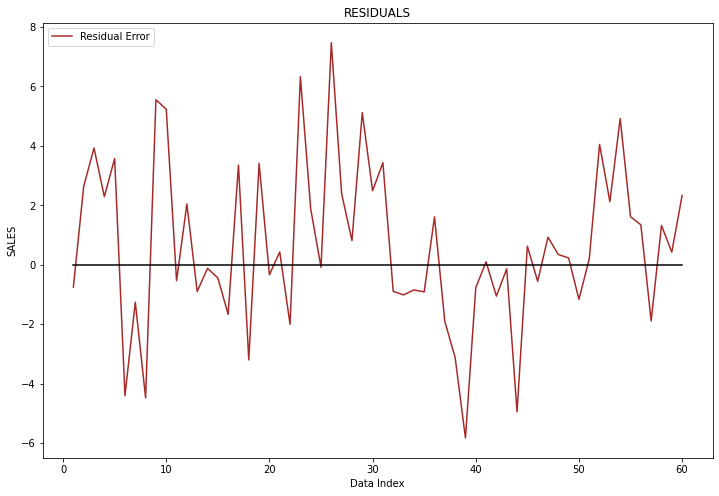

In [53]:
indexler=range(1,61)
#Hata ölçümü grafiği--> Residual error 
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(indexler, y_test-y_pred, label="Residual Error", color="brown")

#Sıfır çizgisi
ax.plot(indexler, np.zeros(60), color="black") #Least squares hatayı minimize etmek hatanın sıfıra yakın olması

plt.title("RESIDUALS")
plt.xlabel("Data Index")
plt.ylabel("SALES")
plt.legend(loc="upper left")
plt.show()

In [57]:
from sklearn.metrics import r2_score,mean_squared_error

In [58]:
# R^2 yi hesaplayalım
r_2 = r2_score(y_test,y_pred)

In [61]:
# R^2 yazdır
print('R^2: %', r_2*100)

R^2: % 59.42987267783302


In [63]:
# MSE -> RMSE
mse = mean_squared_error(y_test, y_pred)

# MSE'yi yazdır
print('MSE:', mse)

MSE: 7.975798532854849


In [64]:
# RMSE
import math
rmse = math.sqrt(mse)

# RMSE'yi yazdır
print('RMSE:', rmse)

RMSE: 2.8241456288327007
